In [1]:
# @title Download file { display-mode: "form" }
!wget https://cdn.discordapp.com/attachments/1186524138878279731/1186524940032278578/2556-2565.csv

--2023-12-19 04:35:40--  https://cdn.discordapp.com/attachments/1186524138878279731/1186524940032278578/2556-2565.csv
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.133.233, 162.159.130.233, 162.159.135.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.133.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4225 (4.1K) [text/csv]
Saving to: ‘2556-2565.csv’

2556-2565.csv       100%[===================>]   4.13K  --.-KB/s    in 0s      

2023-12-19 04:35:40 (10.9 MB/s) - ‘2556-2565.csv’ saved [4225/4225]



In [ ]:
# @title Auto ARIMA { display-mode: "form" }
AUTO_ARIMA = "enable" # @param ["enable", "disable"]
if AUTO_ARIMA == "Qenable":
  !pip install pmdarima

In [ ]:
# @title Import module { display-mode: "form" }
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# @title Function plot graph { display-mode: "form" }

def plot_main(title, data=None, predict=None, forecast=None, confidence_intervals=None):
  xmin, xmax = None, None

  plt.figure(figsize=(32, 8))

  if data is not None:
    xmin, xmax = data.index[0], data.index[-1]
    plt.plot(data, linestyle='-', label='Quanitity')

  if predict is not None and forecast is not None:
    predict_forecast = pd.concat([predict, forecast])
    plt.plot(predict_forecast, linestyle='-', label='Forecast')
  else:
    if predict is not None:
      plt.plot(predict, linestyle='-', label='Forecast')

    if forecast is not None:
      plt.plot(forecast, linestyle='-', label='Forecast')

  if confidence_intervals is not None:
    plt.fill_between(confidence_intervals.index, confidence_intervals.loc[:, 'lower Quanitity'], confidence_intervals.loc[:, 'upper Quanitity'], alpha=0.3)

  plt.title(title)
  plt.xlabel('Year')
  plt.ylabel('Amount (Tons)')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=90)

  if forecast is not None:
    xmax = forecast.index[-1]
    if xmin is None:
      xmin = forecast.index[0]

  plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
  plt.xlim(xmin,xmax)

  current_values = plt.gca().get_yticks()
  plt.gca().yaxis.set_major_locator(mticker.FixedLocator(current_values))
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
  return plt.show()

In [ ]:
# @title Function timeseries test { display-mode: "form" }
# @markdown show ADF Statistic, P-value, Critical-Value and plot ACF, PACF
def timeseries_test(data):
  result = adfuller(data['Quanitity'].dropna())
  print(f'{"ADF Statistic":<15}: {result[0]}')
  print(f'{"P-Value":<15}: {result[1]}')
  print(f'Critical-Value:')
  print(f'\t{"1%":<11}: {result[4]["1%"]}')
  print(f'\t{"5%":<11}: {result[4]["5%"]}')
  print(f'\t{"10%":<11}: {result[4]["10%"]}')
  if (result[1] <= 0.05) & (result[4]['1%'] > result[0]):
      print("\u001b[32mStationary\u001b[0m")
  else:
      print("\x1b[31mNon-stationary\x1b[0m")

  fig, ax = plt.subplots(1,2,figsize=(12, 4))
  plot_acf(data.dropna(), ax=ax[0])
  plot_pacf(data.dropna(), ax=ax[1])
  return plt.show()

In [ ]:
# @title import data from file
df = pd.read_csv('2556-2565.csv', header=0, thousands=',')

In [ ]:
df.head()

,Year,Month,Quanitity,Value
0,2013,1,831768,8135251458
1,2013,2,892952,8109912134
2,2013,3,942722,9304652694
3,2013,4,557222,5871398621
4,2013,5,755933,7412256858


In [ ]:
df.tail()

,Year,Month,Quanitity,Value
115,2022,8,741357,12276505956
116,2022,9,631677,10689551448
117,2022,10,718574,11634607110
118,2022,11,654013,11330348811
119,2022,12,1073795,13642624096


In [ ]:
# @title Copy imported data to new dataframe
data = pd.DataFrame()
data['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))
data['Quanitity'] = df['Quanitity'].astype('float64')
data.set_index('Date', inplace=True)
data.index = pd.DatetimeIndex(data.index.values,freq=data.index.inferred_freq)

In [ ]:
data.head()

,Quanitity
2013-01-01,831768.0
2013-02-01,892952.0
2013-03-01,942722.0
2013-04-01,557222.0
2013-05-01,755933.0


In [ ]:
data.tail()

,Quanitity
2022-08-01,741357.0
2022-09-01,631677.0
2022-10-01,718574.0
2022-11-01,654013.0
2022-12-01,1073795.0


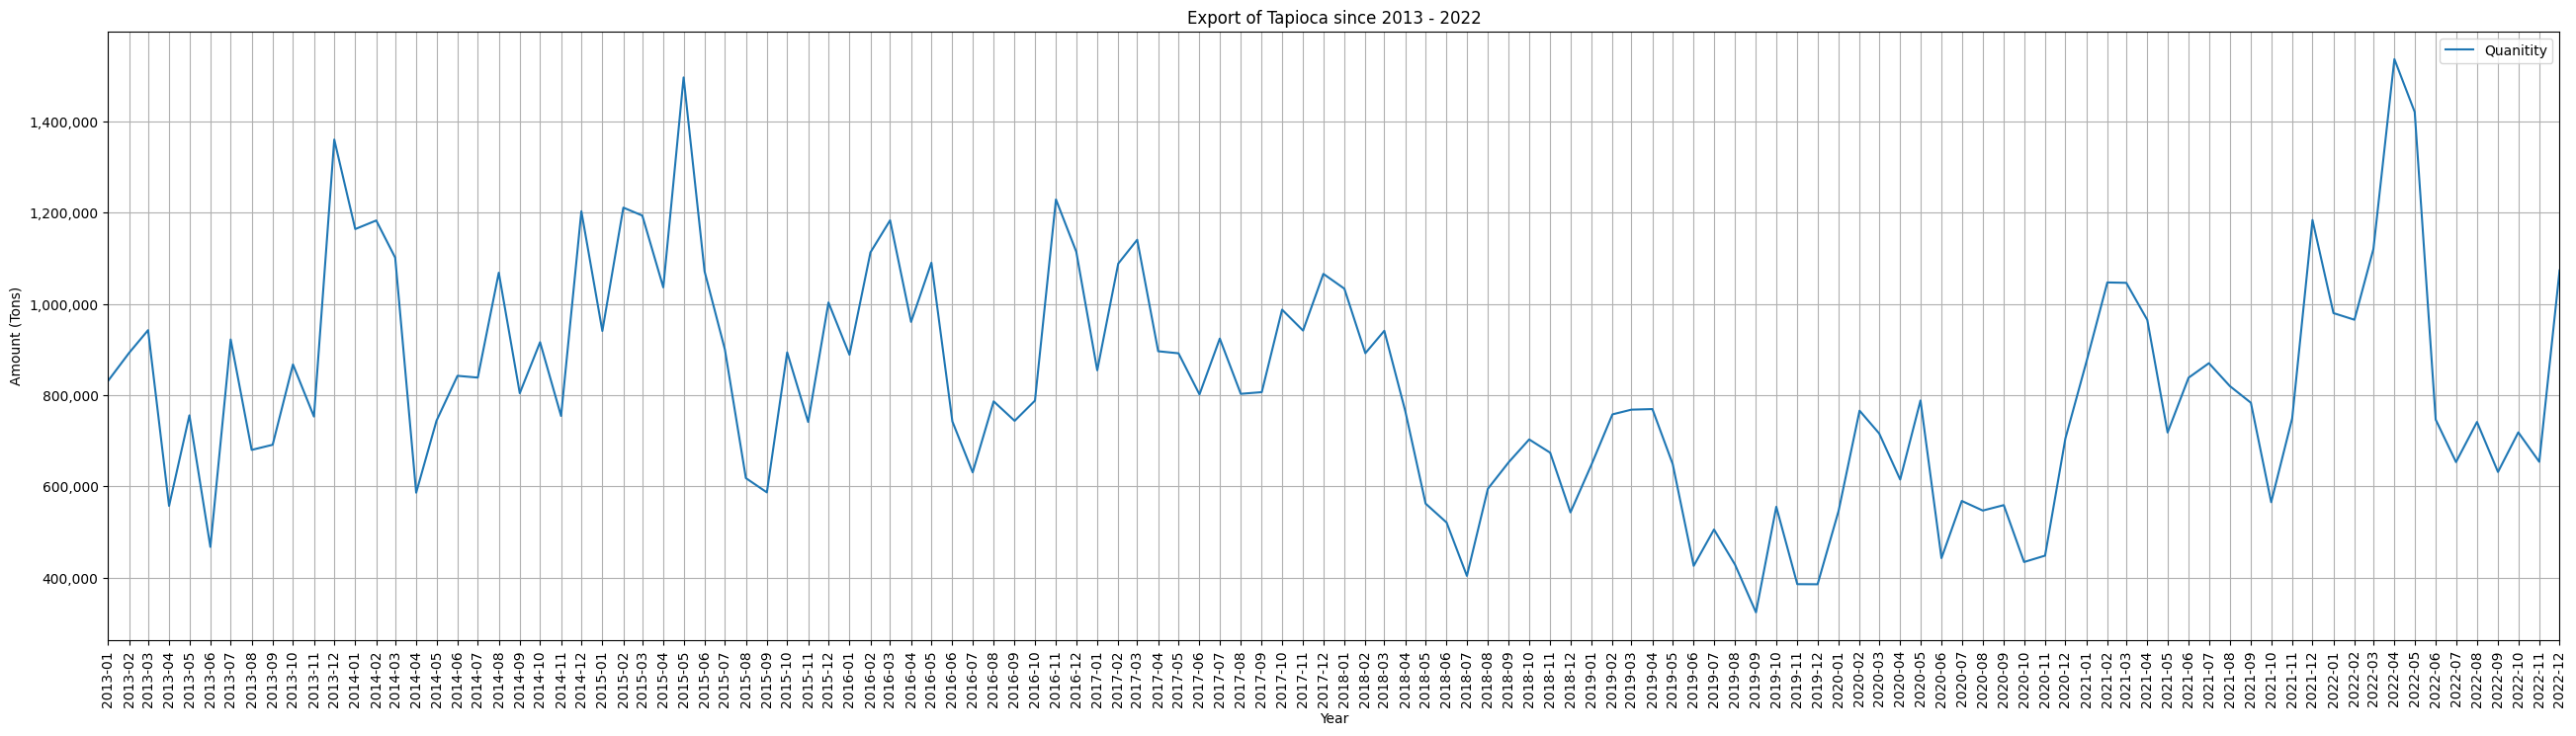

In [ ]:
# @title Plot actual graph
plot_main("Export of Tapioca since 2013 - 2022", data=data)

ADF Statistic  : -1.6676297332028207
P-Value        : 0.44786300957830755
Critical-Value:
	1%         : -3.490683082754047
	5%         : -2.8879516565798817
	10%        : -2.5808574442009578
Non-stationary


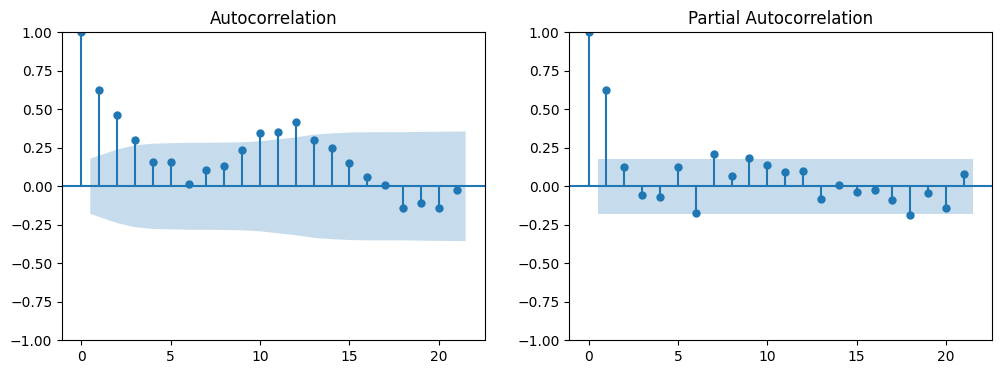

In [ ]:
# @title Find original p-value, acf and pacf
timeseries_test(data)

Differenced 1 Time.
ADF Statistic  : -6.778653835079947
P-Value        : 2.532389465522665e-09
Critical-Value:
	1%         : -3.4912451337340342
	5%         : -2.8881954545454547
	10%        : -2.5809876033057852
Stationary


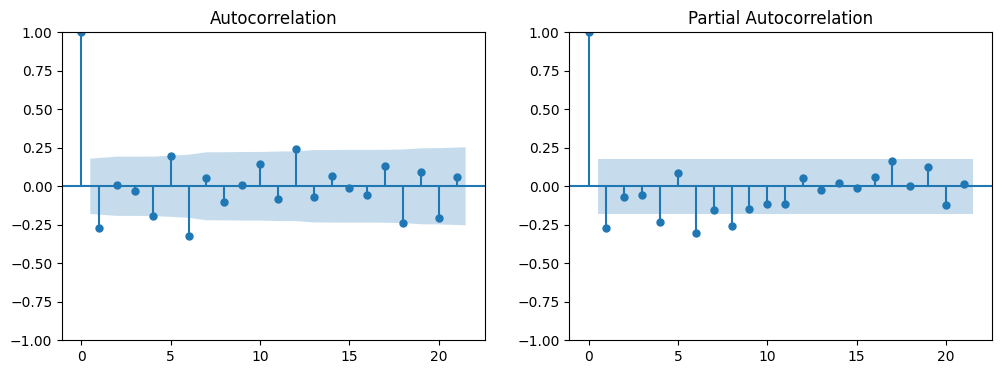

Differenced 2 Time.
ADF Statistic  : -7.270326116437746
P-Value        : 1.5946583818042317e-10
Critical-Value:
	1%         : -3.4942202045135513
	5%         : -2.889485291005291
	10%        : -2.5816762131519275
Stationary


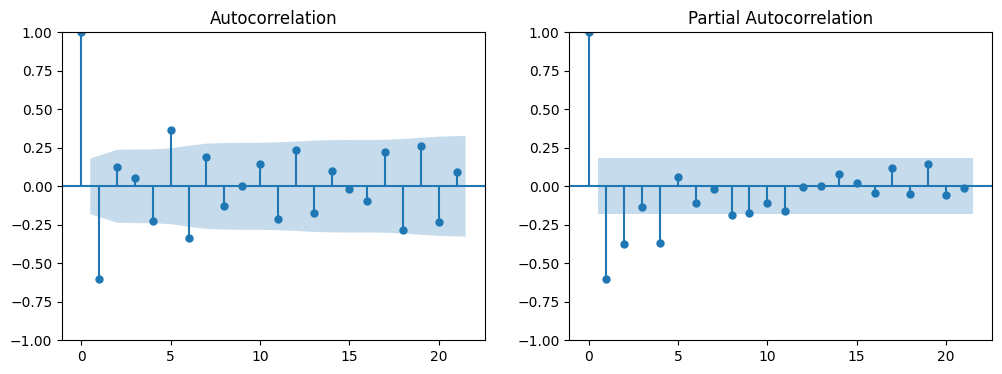

Differenced 3 Time.
ADF Statistic  : -7.153628001363599
P-Value        : 3.0949865803463876e-10
Critical-Value:
	1%         : -3.4954932834550623
	5%         : -2.8900369024285117
	10%        : -2.5819706975209726
Stationary


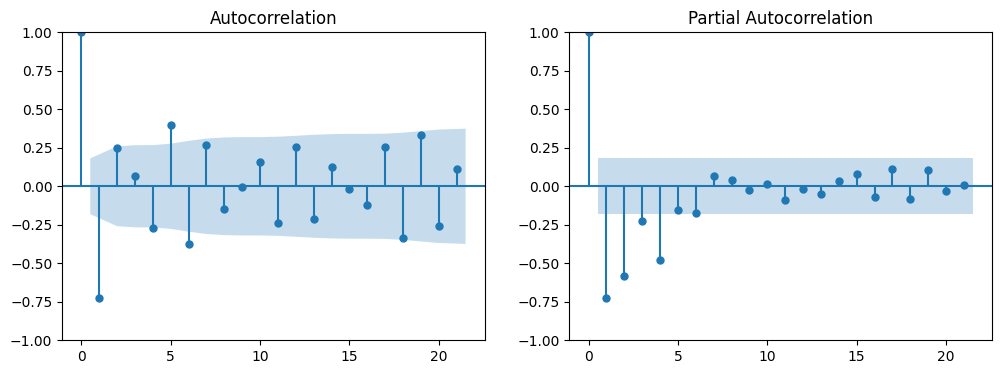

Differenced 4 Time.
ADF Statistic  : -7.236596898536621
P-Value        : 1.932311588826619e-10
Critical-Value:
	1%         : -3.4961490537199116
	5%         : -2.8903209639580556
	10%        : -2.5821223452518263
Stationary


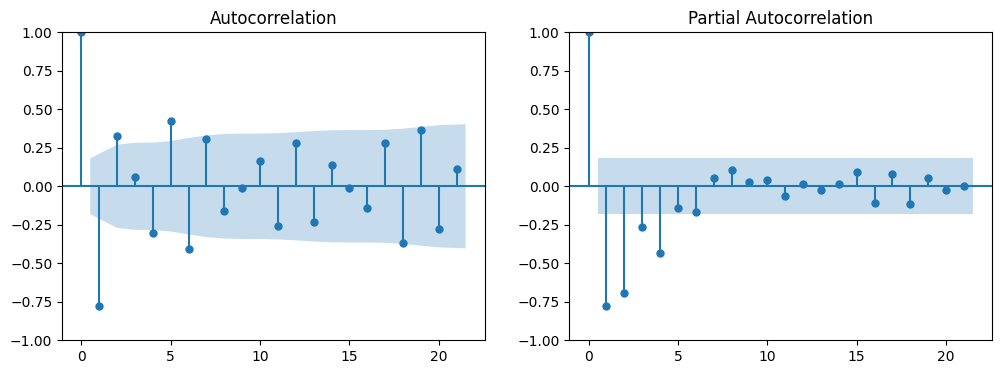

Differenced 5 Time.
ADF Statistic  : -7.595232356248498
P-Value        : 2.470483669384014e-11
Critical-Value:
	1%         : -3.4968181663902103
	5%         : -2.8906107514600103
	10%        : -2.5822770483285953
Stationary


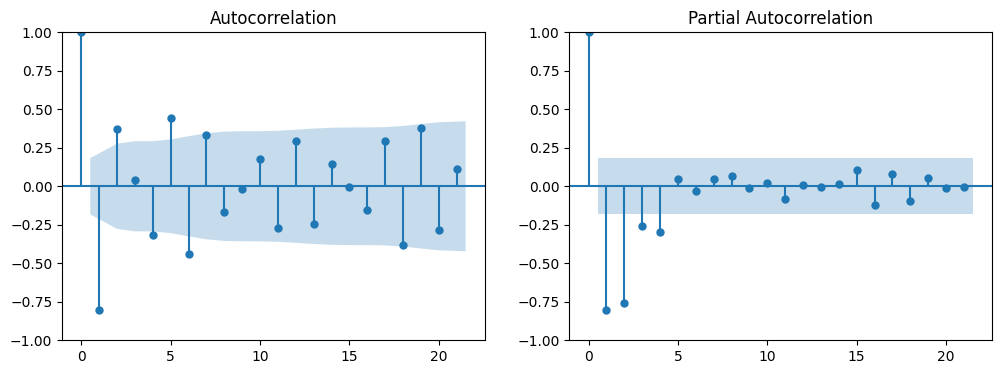

In [ ]:
# @title Find n order of difference p-value, acf and pacf
order_amount = 5 # @param {type:"integer"}

differenced_data_arr = []
differenced_data = data[:]
for i in range(1, order_amount+1):
  differenced_data['Quanitity'] = differenced_data['Quanitity'].diff()
  print(f'Differenced {i} Time.')
  timeseries_test(differenced_data)
  differenced_data_arr.append(differenced_data[:])

ADF Statistic  : -6.778653835079947
P-Value        : 2.532389465522665e-09
Critical-Value:
	1%         : -3.4912451337340342
	5%         : -2.8881954545454547
	10%        : -2.5809876033057852
Stationary


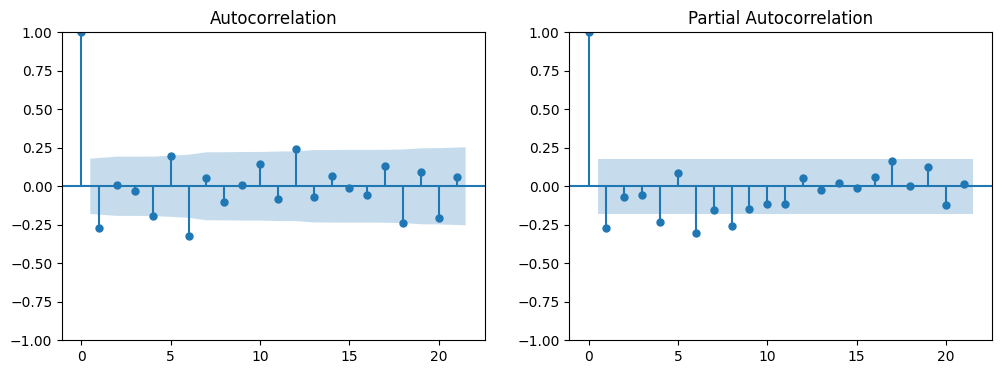

In [ ]:
# @title Confirm number of difference for p-value
# @markdown Warning: choice value should be less than and equal to order_amount
choice_diff = 1 # @param {type:"integer"}

if (choice_diff >  order_amount):
  print("Warning: choice value should be less than and equal to order_amount!")
else:
  choice_diff_data = differenced_data_arr[choice_diff-1]
  timeseries_test(choice_diff_data)

In [ ]:
# @title Setting Model { display-mode: "form" }
# @markdown if AUTO_ARIMA is disable use this (p, d, q) and (P, D, Q)

# @markdown setting (d, D) Value
d = 1   # @param {type:"integer"}
D = 0   # @param {type:"integer"}

# @markdown Setting (p, q) Value
p = 1   # @param {type:"integer"}
q = 1   # @param {type:"integer"}
# @markdown Setting (P, Q) Value
P = 1   # @param {type:"integer"}
Q = 0   # @param {type:"integer"}
S = 12

In [ ]:
# @title Auto ARIMA
# @markdown execute this code if AUTO_ARIMA is Enable
if AUTO_ARIMA == "enable":
  from pmdarima.arima import auto_arima
  auto_model = auto_arima(data,
                          d=d, D=D,
                          start_p=0, max_p=5,
                          start_q=0, max_q=5,
                          m=12,
                          start_P=1, max_P=5,
                          start_Q=1, max_Q=5,
                          seasonal=True,
                          test='adf')


In [ ]:
# @title Testing another parameter

import itertools
list_test = []
p = q = P = Q = range(0, 5)
pq = list(itertools.product(p, q))
PQ = list(itertools.product(P, Q))

for param_pq in pq:
  for param_PQ in PQ:
    try:
        model = ARIMA(data, order = [param_pq[0], 1, param_pq[1]], seasonal_order = [param_PQ[0], 0, param_PQ[1], 12])
        results = model.fit()
        res = [(param_pq[0], 1 , param_pq[1]), (param_PQ[0], 0, param_PQ[1], 12), results.aic, results.bic ]
        list_test.append(res)
    except:
        continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

In [ ]:
list_test.sort(key=lambda x: (x[2]+x[3]))
list_test_df=pd.DataFrame(list_test)
list_test_df[2]=list_test_df[2].map("{:.3f}".format)
list_test_df[3]=list_test_df[3].map("{:.3f}".format)
list_test_df

,0,1,2,3
0,"(1, 1, 1)","(1, 0, 0, 12)",3239.858,3250.975
1,"(1, 1, 1)","(0, 0, 1, 12)",3241.024,3252.140
2,"(1, 1, 1)","(1, 0, 1, 12)",3239.934,3253.830
3,"(3, 1, 2)","(0, 0, 0, 12)",3238.717,3255.392
4,"(1, 1, 4)","(1, 0, 0, 12)",3237.429,3256.883
...,...,...,...,...
618,"(4, 1, 4)","(4, 0, 4, 12)",3250.218,3297.463
619,"(3, 1, 0)","(4, 0, 4, 12)",3257.372,3290.722
620,"(0, 1, 0)","(4, 0, 4, 12)",3262.237,3287.249
621,"(0, 1, 0)","(4, 0, 3, 12)",3279.241,3301.474


In [ ]:
# @title Create model, Fit model and Summary model
model = ARIMA(data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         Quanitity   No. Observations:                  120
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1615.929
Date:                           Thu, 23 Nov 2023   AIC                           3239.858
Time:                                   04:25:06   BIC                           3250.975
Sample:                               01-01-2013   HQIC                          3244.372
                                    - 12-01-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5065      0.144      3.508      0.000       0.224       0.789
ma.L1         -0.8866      0.070    -12.608      0.000      -1.024      -0.749
ar.S.L12       0.2514      0.100      2.511      0.012       0.055       0.448
sigma2      4.125e+10    8.2e-13   5.03e+22      0.000    4.12e+10    4.12e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                16.16
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.56
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [ ]:
order = (p,d,q)
seasonal_order = (P,D,Q,S)

if AUTO_ARIMA == "enable":
  order = auto_model.order
  seasonal_order = auto_model.seasonal_order

print(f"Selected Order is {order} and Sersonal Order is {auto_model.seasonal_order}")

In [ ]:
# @title Predict summary
predicted_test = model_fit.get_prediction(start=0, end=120)
predicted_label = predicted_test.row_labels[:-1]

predicted_mean = predicted_test.predicted_mean[1:]
predicted_mean.index = predicted_label

predicted_confidence_intervals = predicted_test.conf_int()[1:]
predicted_confidence_intervals.index = predicted_label

predict_df = pd.concat([predicted_mean,predicted_confidence_intervals], axis=1)
predict_df['predicted_mean'] = predict_df['predicted_mean'].map("{:.2f}".format)
predict_df

,predicted_mean,lower Quanitity,upper Quanitity
2013-01-01,635516.54,198759.595552,1.072273e+06
2013-02-01,721458.55,292290.633806,1.150626e+06
2013-03-01,787553.38,363330.636281,1.211776e+06
2013-04-01,553509.36,132703.019270,9.743157e+05
2013-05-01,684297.13,265967.486902,1.102627e+06
...,...,...,...
2022-08-01,810580.11,412519.615312,1.208641e+06
2022-09-01,684555.09,286494.593785,1.082616e+06
2022-10-01,806406.91,408346.414045,1.204467e+06
2022-11-01,842412.18,444351.686694,1.240473e+06


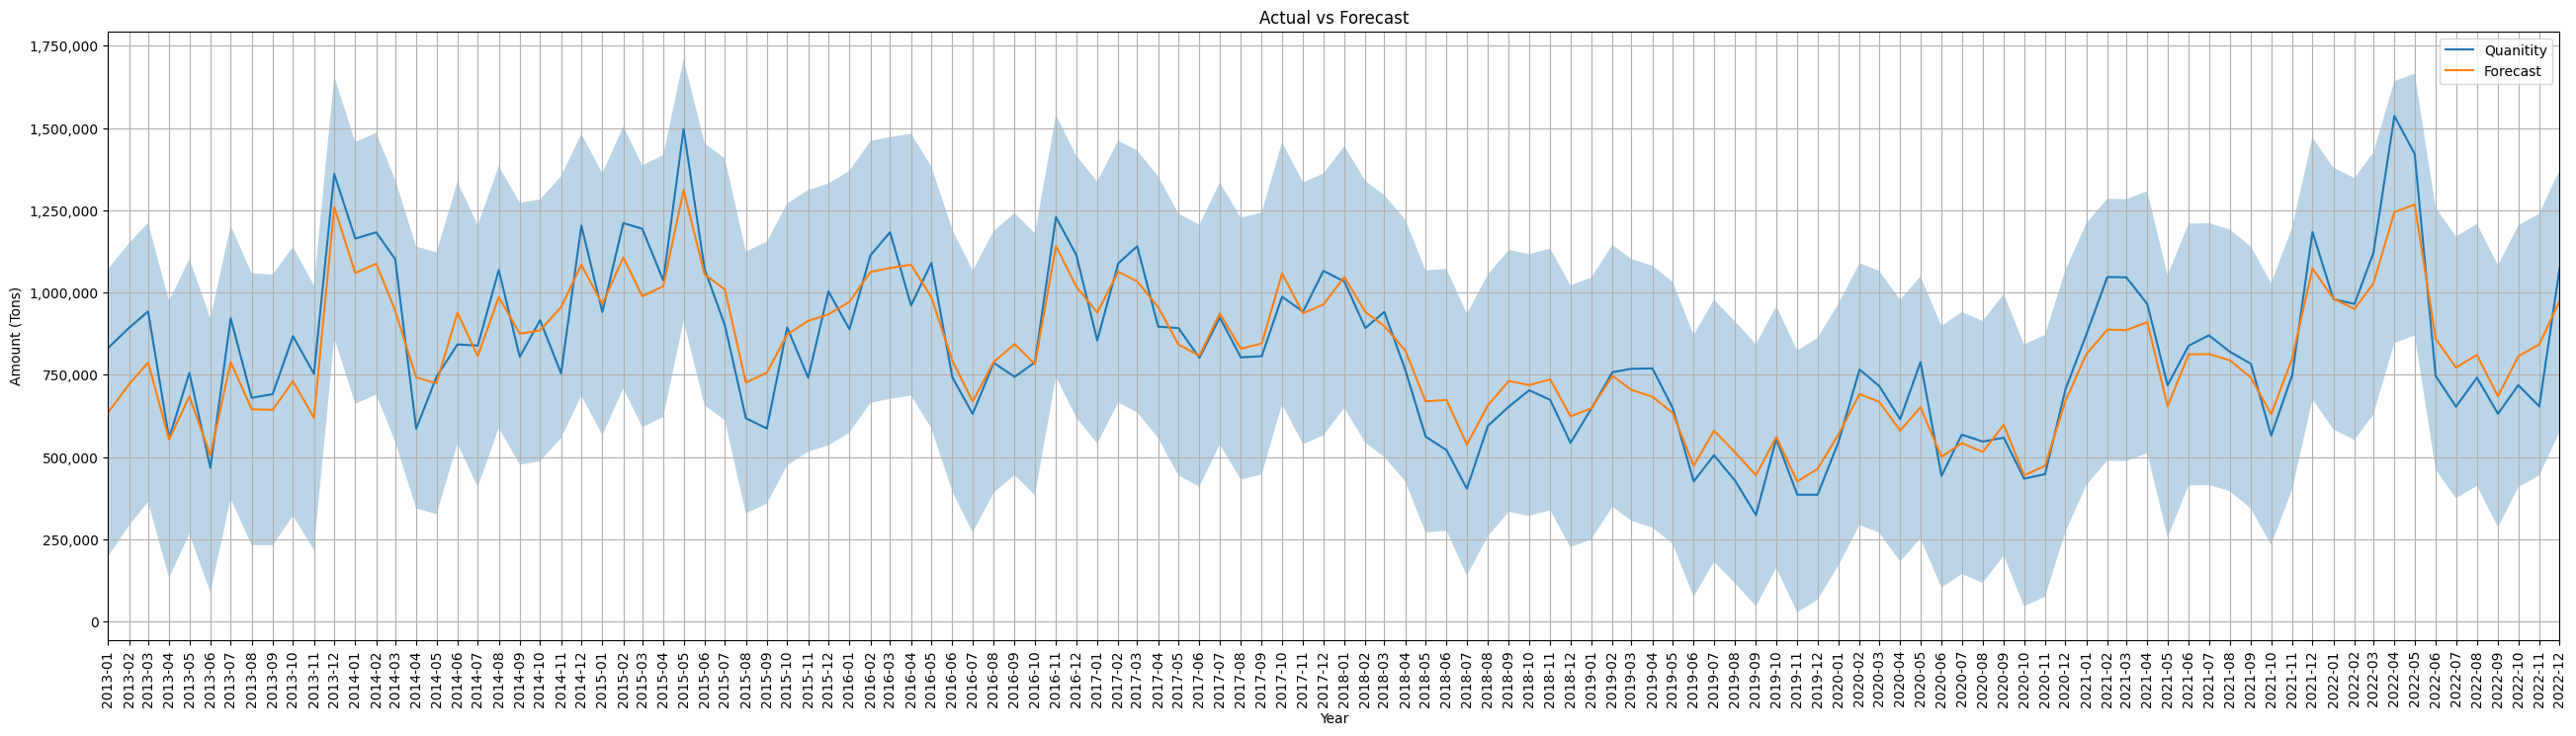

In [ ]:
# @title Predict Graph
plot_main('Actual vs Forecast', data=data, predict=predicted_mean, confidence_intervals=predicted_confidence_intervals)

In [ ]:
# @title MAPE, MSE, MAD and RMSE

a = data['Quanitity']
f = predicted_mean[:]

mape = np.mean(np.abs((a - f) / a)*100)
mad = np.mean(np.abs(f - np.average(a)))
mse = np.mean((a-f)**2)/a.size
rmse = np.sqrt(mse)


print(f'MAPE: {mape:.2f}%')
print(f"MSE: {mse}")
print(f"MAD: {mad}")
print(f"RMSE: {rmse}")

MAPE: 9.80%
MSE: 74471612.79568471
MAD: 162646.284037383
RMSE: 8629.693667546067


In [ ]:
# @title Setting forecast range
year = 5 # @param {type:"integer"}
forecast_step = 12 * year

In [ ]:
# @title Forecast summary
forecast = model_fit.get_forecast(steps=forecast_step+1)
forecast_label = forecast.row_labels[:-1]

forecast_mean = forecast.predicted_mean[1:]
forecast_mean.index = forecast_label

forecast_confidence_intervals = forecast.conf_int()[1:]
forecast_confidence_intervals.index = forecast_label

forecast_df = pd.concat([forecast_mean,forecast_confidence_intervals], axis=1)
forecast_df['predicted_mean'] = forecast_df['predicted_mean'].map("{:.2f}".format)
forecast_df

,predicted_mean,lower Quanitity,upper Quanitity
2023-01-01,946588.65,478253.142313,1.414924e+06
2023-02-01,973283.07,475008.602166,1.471558e+06
2023-03-01,1071767.52,556483.650309,1.587051e+06
2023-04-01,1039456.62,512217.074153,1.566696e+06
2023-05-01,868238.49,331282.670268,1.405194e+06
2023-06-01,844016.45,298432.889160,1.389600e+06
2023-07-01,865724.44,312087.261205,1.419362e+06
2023-08-01,837941.25,276581.218659,1.399301e+06
2023-09-01,859683.67,290812.088861,1.428555e+06
2023-10-01,843398.57,267166.304065,1.419631e+06


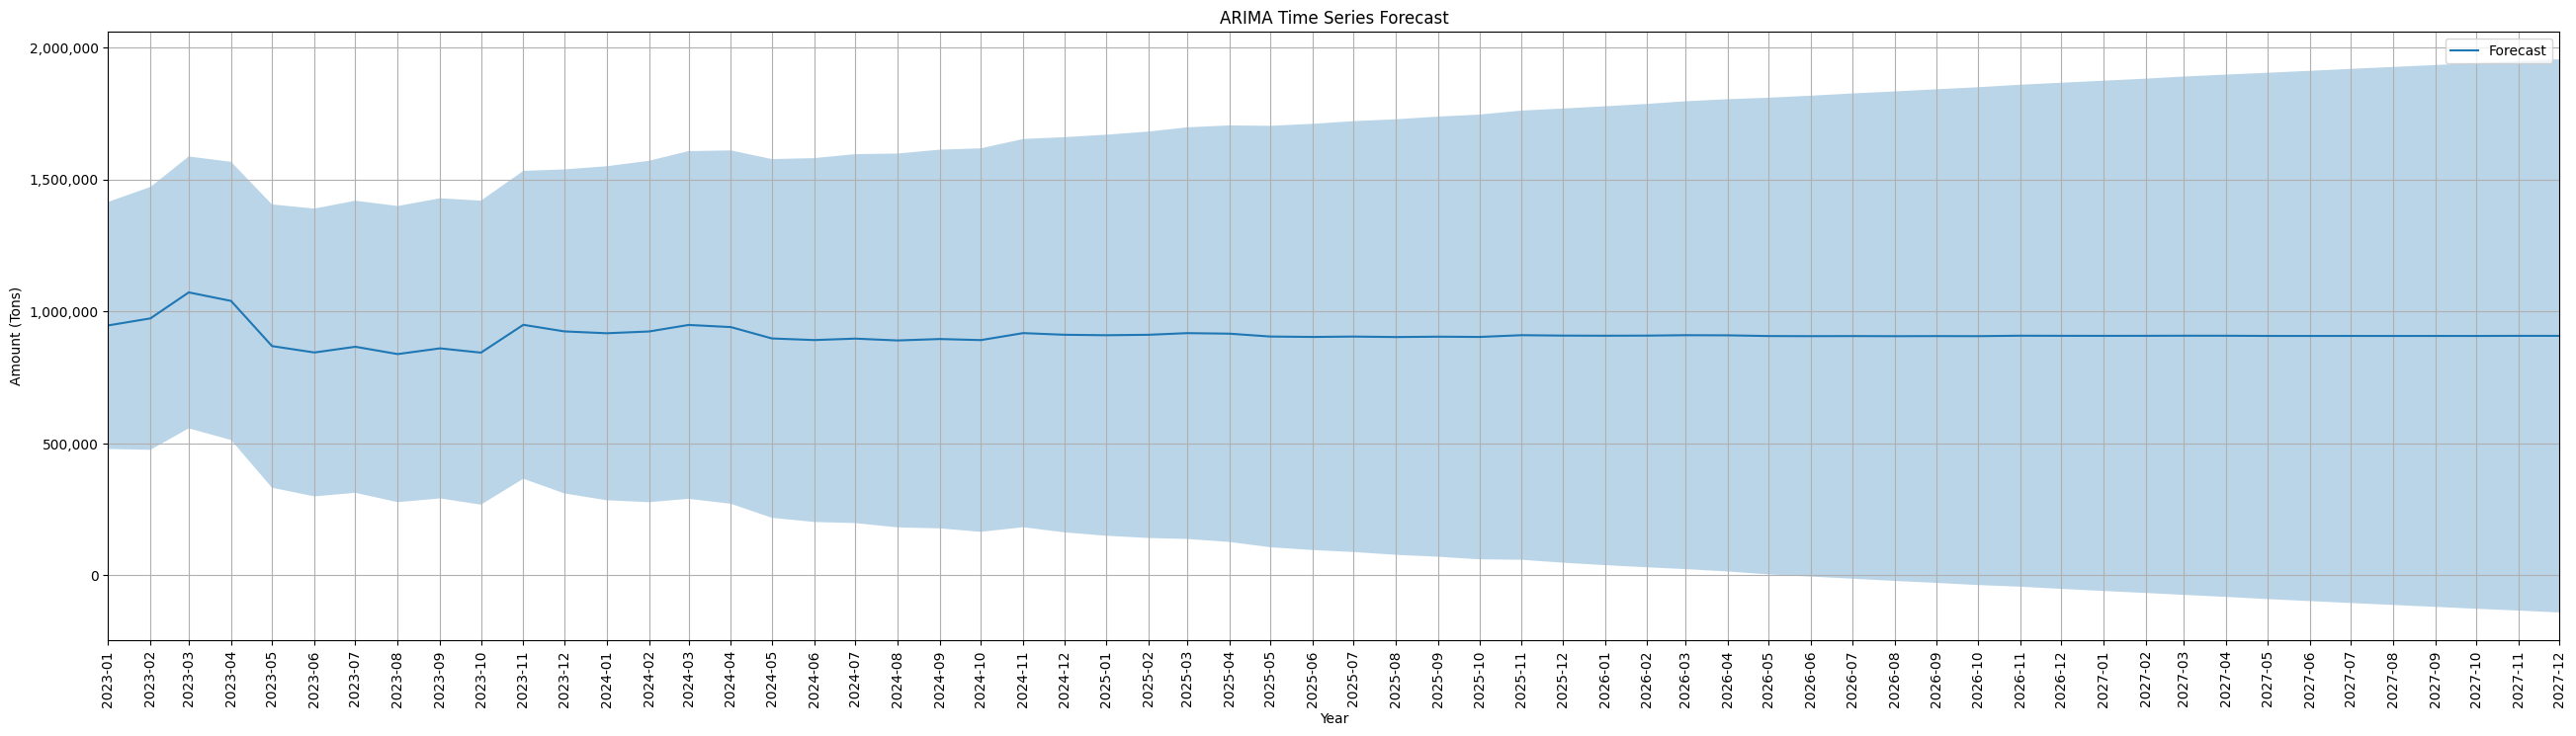

In [ ]:
# @title Forecast graph
plot_main('ARIMA Time Series Forecast', forecast=forecast_mean, confidence_intervals=forecast_confidence_intervals)

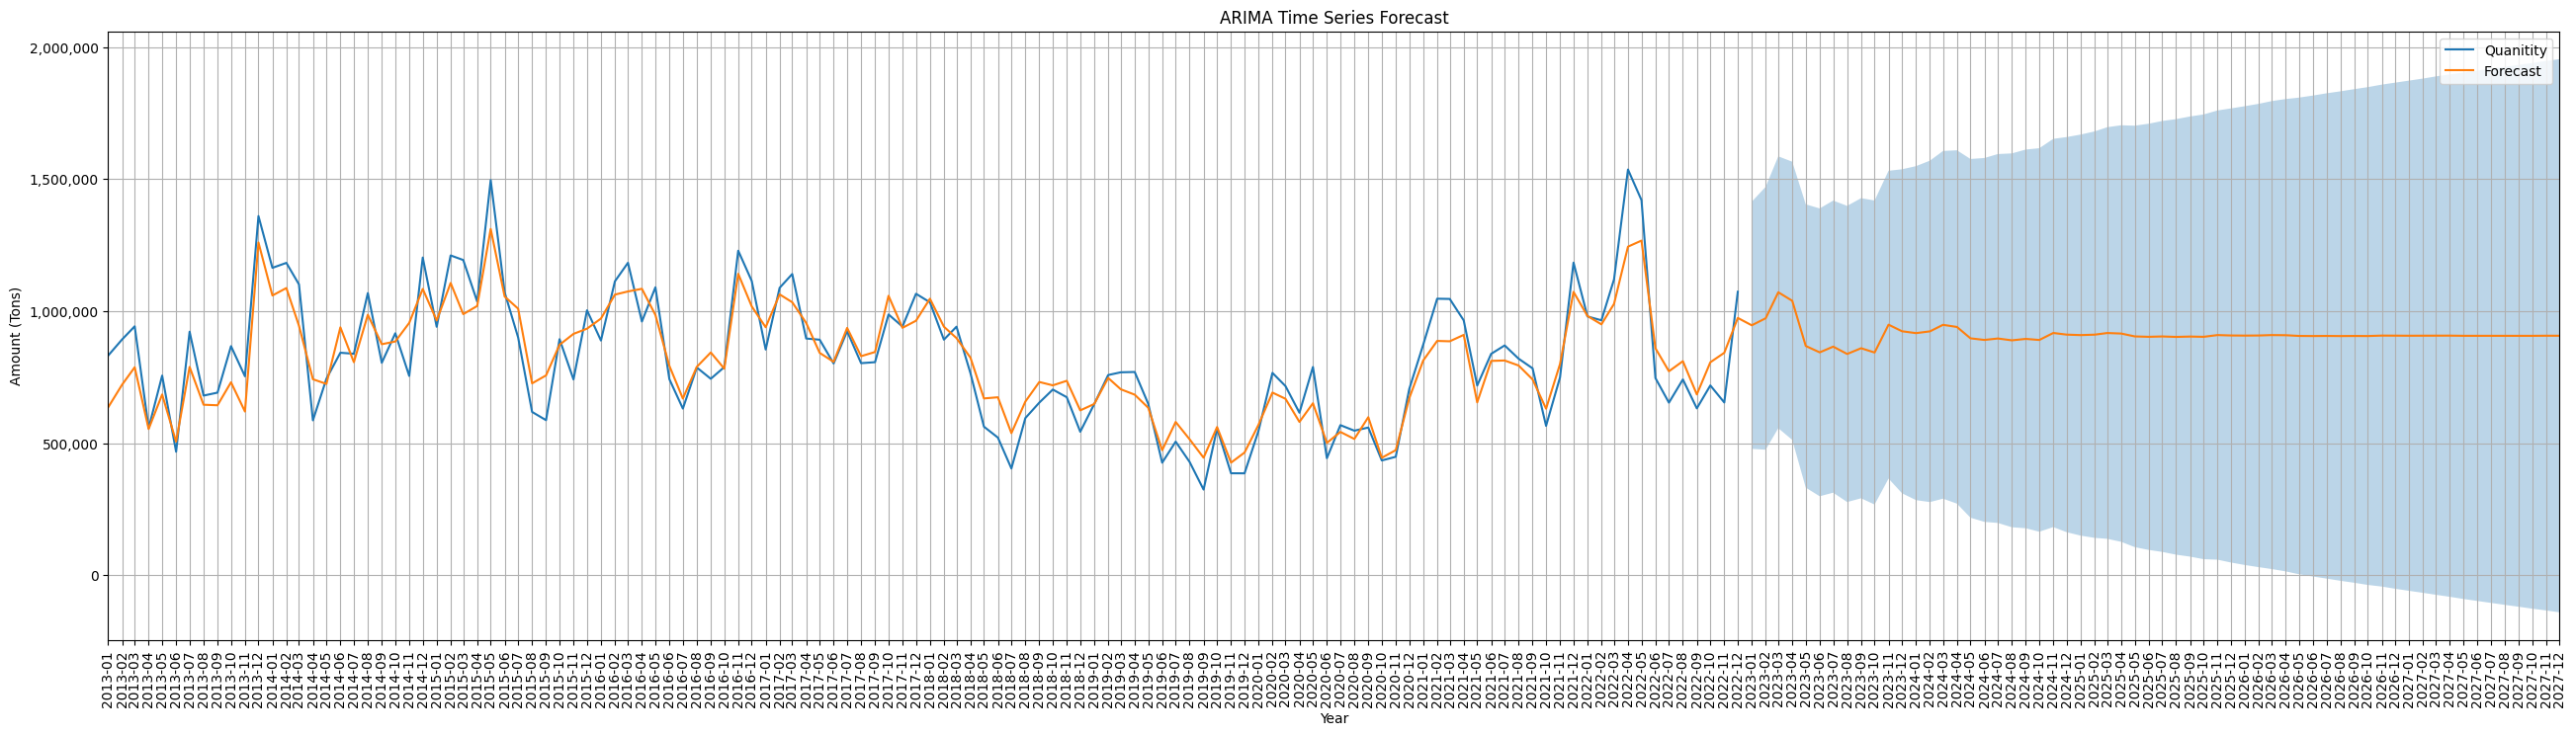

In [ ]:
# @title With actual graph
plot_main('ARIMA Time Series Forecast', data=data, forecast=forecast_mean, predict=predicted_mean, confidence_intervals=forecast_confidence_intervals)